In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
X_train[0][:5]

[1, 14, 22, 16, 43]

In [4]:
array([1415,   33,    6,   22,   12])


NameError: ignored

In [5]:
X_train = pad_sequences(X_train, maxlen = 100)
X_test = pad_sequences(X_test, maxlen=100)


In [6]:
X_train.shape


(25000, 100)

In [7]:
vocab_size = 20000
embed_size = 128

Build LSTM Network

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

Embedding layer:
The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires 3 arguments:

input_dim: This is the size of the vocabulary in the text data which is 20000 in this case.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word.
input_shape: This is the shape of the input which we have to pass as a parameter to the first layer of our neural network.

In [9]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 60)                45360     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/5
196/196 [==============================] - 10s 15ms/step - loss: 0.4330 - accuracy: 0.7883 - val_loss: 0.3420 - val_accuracy: 0.8513
Epoch 2/5
196/196 [==============================] - 3s 16ms/step - loss: 0.2348 - accuracy: 0.9093 - val_loss: 0.3617 - val_accuracy: 0.8486
Epoch 3/5
196/196 [==============================] - 2s 13ms/step - loss: 0.1413 - accuracy: 0.9498 - val_loss: 0.3858 - val_accuracy: 0.8367
Epoch 4/5
196/196 [==============================] - 2s 12ms/step - loss: 0.0929 - accuracy: 0.9682 - val_loss: 0.5562 - val_accuracy: 0.8325
Epoch 5/5
196/196 [==============================] - 2s 13ms/step - loss: 0.0553 - accuracy: 0.9821 - val_loss: 0.5907 - val_accuracy: 0.8296


In [13]:
history.history


{'loss': [0.43296417593955994,
  0.2347855418920517,
  0.14126186072826385,
  0.09291588515043259,
  0.05532992631196976],
 'accuracy': [0.7882800102233887,
  0.9093199968338013,
  0.9498000144958496,
  0.9682400226593018,
  0.9820799827575684],
 'val_loss': [0.34200870990753174,
  0.36173179745674133,
  0.3857826590538025,
  0.5562038421630859,
  0.5907151699066162],
 'val_accuracy': [0.8513200283050537,
  0.8485599756240845,
  0.8367199897766113,
  0.8324800133705139,
  0.8295999765396118]}

In [14]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

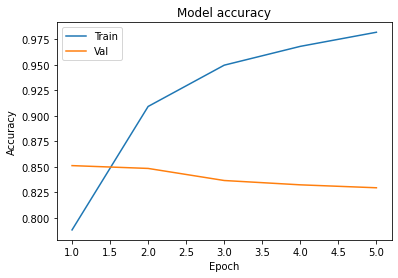

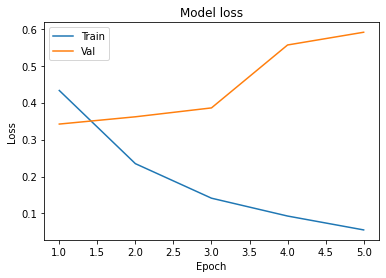

In [15]:
plot_learningCurve(history, 5)


In [18]:
from keras.layers import Dense


In [19]:
rnn = Sequential()
rnn.add(Embedding(vocab_size, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (vocab_size, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

NameError: ignored